In [1]:
import os
import os.path
import sys 

from pathlib import Path
from glob import glob

import matplotlib.pyplot as plt
#import cv2
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.5.0


In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [3]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# data set

* [Intel Image dataset](https://www.kaggle.com/puneet6060/intel-image-classification)

In [5]:
# loading the directories 
datapath = "D:\\programing\\DataSets\\Classification\\IntelImageClassification"
dataset_path = Path(datapath)
list(dataset_path.iterdir())

[WindowsPath('D:/programing/DataSets/Classification/IntelImageClassification/data.txt'),
 WindowsPath('D:/programing/DataSets/Classification/IntelImageClassification/seg_pred'),
 WindowsPath('D:/programing/DataSets/Classification/IntelImageClassification/seg_test'),
 WindowsPath('D:/programing/DataSets/Classification/IntelImageClassification/seg_train')]

In [6]:
folders = glob(datapath+"/seg_train/seg_train/*")
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 6


In [7]:
input_shape = (150,150,3)

In [17]:
from keras.preprocessing.image import ImageDataGenerator


training_datagen = ImageDataGenerator(
                                    rescale=1./255,   
                                    shear_range=0.2, 
                                    zoom_range=0.2,
                                    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

training_generator = training_datagen.flow_from_directory( datapath+"/seg_train/seg_train", target_size = input_shape[0:2], batch_size = 32, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory( datapath+"/seg_test/seg_test", target_size = input_shape[0:2], batch_size = 32, class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


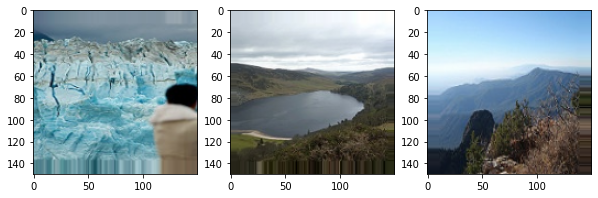

In [49]:
data = training_generator.__getitem__(1)

from random import choice
img = data[0]
plt.figure(figsize=(10,10))
for i in range(3):
    img = choice(data[0])
    plt.subplot(131+i)
    plt.imshow(img)

plt.show()


In [9]:
from VGGModel import GetVGGModel
model = GetVGGModel(input_shape, VGG_type="VGG16", out_channels=num_classes)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy' ,metrics=['accuracy'])

In [11]:
mc = ModelCheckpoint(mode='max', filepath='top-weights.h5', monitor='val_accuracy',save_best_only='True', save_weights_only='True', verbose=1)
es = EarlyStopping(mode='max', monitor='val_accuracy', patience=10, verbose=0, restore_best_weights=True)
rl = ReduceLROnPlateau(monitor='val_accuracy',factor=0.1,patience=5,verbose=1,mode="max",min_lr=0.0001)
callbacks=[mc,es,rl]

In [19]:
history = model.fit(training_generator, epochs=30,
                              validation_data=validation_generator,callbacks=callbacks)

Epoch 1/30
439/439 [==============================] - 138s 301ms/step - loss: 1.7478 - accuracy: 0.3470 - val_loss: 1.4304 - val_accuracy: 0.4050

Epoch 00001: val_accuracy improved from -inf to 0.40500, saving model to top-weights.h5
Epoch 2/30
439/439 [==============================] - 62s 141ms/step - loss: 1.3835 - accuracy: 0.4148 - val_loss: 1.4498 - val_accuracy: 0.4950

Epoch 00002: val_accuracy improved from 0.40500 to 0.49500, saving model to top-weights.h5
Epoch 3/30
439/439 [==============================] - 62s 141ms/step - loss: 1.2306 - accuracy: 0.4810 - val_loss: 1.2015 - val_accuracy: 0.5523

Epoch 00003: val_accuracy improved from 0.49500 to 0.55233, saving model to top-weights.h5
Epoch 4/30
439/439 [==============================] - 62s 141ms/step - loss: 1.1480 - accuracy: 0.5110 - val_loss: 2.2947 - val_accuracy: 0.3157

Epoch 00004: val_accuracy did not improve from 0.55233
Epoch 5/30
439/439 [==============================] - 61s 139ms/step - loss: 1.0796 - accu

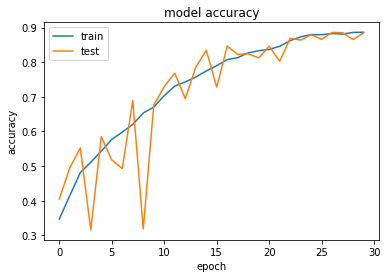

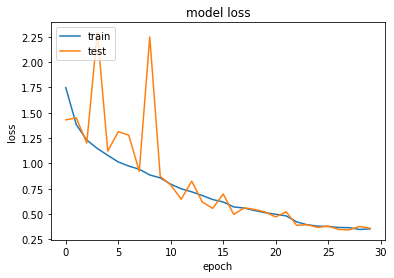

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()